# 🔋 Mobile Battery Life Prediction

This project builds a Machine Learning model to predict smartphone battery life
based on device specifications and usage behavior.

Models used:
- Linear Regression
- Decision Tree Regressor


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

import joblib

print("Libraries loaded successfully ✅")


Libraries loaded successfully ✅


In [6]:
np.random.seed(42)

n = 800

data = pd.DataFrame({
    "Screen_Time": np.random.uniform(1, 15, n),
    "Gaming_Hours": np.random.uniform(0, 8, n),
    "Brightness": np.random.uniform(20, 100, n),
    "Battery_Capacity": np.random.uniform(2500, 6000, n),
    "Background_Apps": np.random.randint(0, 40, n),
    "App_Usage": np.random.randint(5, 30, n)
})

data["Battery_Life"] = (
    (data["Battery_Capacity"] / 500)
    - (data["Screen_Time"] * 0.8)
    - (data["Gaming_Hours"] * 1.2)
    - (data["Brightness"] * 0.05)
    - (data["Background_Apps"] * 0.1)
    + np.random.normal(0, 1.5, n)
)

data.head()


,Screen_Time,Gaming_Hours,Brightness,Battery_Capacity,Background_Apps,App_Usage,Battery_Life
0,6.243562,5.657909,35.349386,3692.114583,34,21,-9.914808
1,14.310000,1.220312,45.869725,2750.991611,38,11,-13.521896
2,11.247915,4.610307,38.132512,3933.701132,21,15,-10.597503
3,9.381219,4.853720,48.399704,3589.261233,4,22,-9.615313
4,3.184261,3.393045,25.553907,4869.922239,22,5,-0.056555


In [7]:
X = data.drop("Battery_Life", axis=1)
y = data["Battery_Life"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Data preprocessing complete ✅")


Data preprocessing complete ✅


In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("Linear Regression")
print("MAE:", mean_absolute_error(y_test, lr_pred))
print("R2:", r2_score(y_test, lr_pred))


Linear Regression
MAE: 1.1883927585575165
R2: 0.9274102681754488


In [9]:
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

print("\nDecision Tree")
print("MAE:", mean_absolute_error(y_test, dt_pred))
print("R2:", r2_score(y_test, dt_pred))



Decision Tree
MAE: 2.163898967131403
R2: 0.7390780199705609


In [10]:
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree"],
    "R2 Score": [
        r2_score(y_test, lr_pred),
        r2_score(y_test, dt_pred)
    ]
})

comparison


,Model,R2 Score
0,Linear Regression,0.927410
1,Decision Tree,0.739078


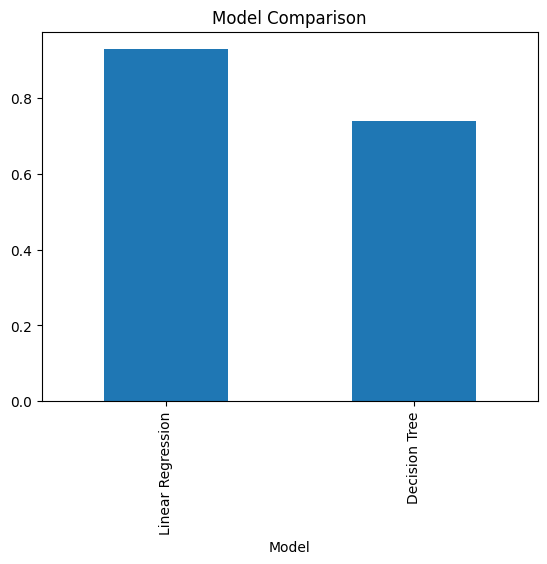

In [11]:
comparison.plot(x="Model", y="R2 Score", kind="bar", legend=False)
plt.title("Model Comparison")
plt.show()


In [12]:
if r2_score(y_test, lr_pred) > r2_score(y_test, dt_pred):
    best_model = lr
    print("Best Model: Linear Regression")
else:
    best_model = dt
    print("Best Model: Decision Tree")

joblib.dump(best_model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully ✅")


Best Model: Linear Regression
Model and scaler saved successfully ✅
